# LIF network using Nest

In [1]:
import nest
import matplotlib.pyplot as plt
import numpy as np


Nest offers simple functions where everything is already implemented. \
We can create a LIF neuron with one line of code, all the equations are written by Nest
More info on Nest: https://nest-simulator.readthedocs.io/en/stable/contents.html

In [2]:
neuron = nest.Create('iaf_psc_alpha') #I am creating the LIF neuron, the equations are already inside Nest, no need to write it
#To check the parameters of my LIF neuron, we can change those values
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [3]:
#You can also ask for a specific value
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

Do you see the parameters we studied in the first tutorial? Which are the default values in Nest of $I_e, τ_m, C_m, V_r, V_{reset}, V_{th}, t_{ref}$ ?

In [4]:
#to change the external input of my neuron
neuron.I_e = 500 
neuron.get(["I_e"]) #To know the value of I_e of my neuron

{'I_e': 500.0}

We can define LIF neuron as we did in the previous tutorial but using the Nest functions. \
With Nest we can create a LIF neuron in a streightforward way, much easier!

In [5]:
def LIF_neuron(I_ext,dt,T):
    nest.ResetKernel()
    nest.resolution = dt #The resolution of my simulation

    neuron = nest.Create('iaf_psc_alpha') #I am creating the LIF neuron, the equations are inside Nest
    neuron.I_e = I_ext # I set the external input to the neuron

    vm_rec = nest.Create('multimeter') #I create a device to record the membrane potential
    vm_rec.set(record_from=["V_m"])
    spike_rec = nest.Create('spike_recorder') #I create a device to record the spikes

    nest.Connect(vm_rec, neuron) #I connect the device to the neuron
    nest.Connect(neuron, spike_rec) #I connect the neuron to the spike recording device

    return vm_rec,spike_rec

#function to plot the result of my simulation
def plot_LIF(vm):
    figure = plt.figure(figsize=(9,6))
    potentials = vm.get('events', 'V_m')
    times = vm.get('events', 'times')
    plt.plot(times, potentials)
    plt.title("Membrane potential vs time")
    plt.xlabel("time (ms)")
    plt.ylabel("V_m (mV)")
    plt.show()

  Number of spikes: 3


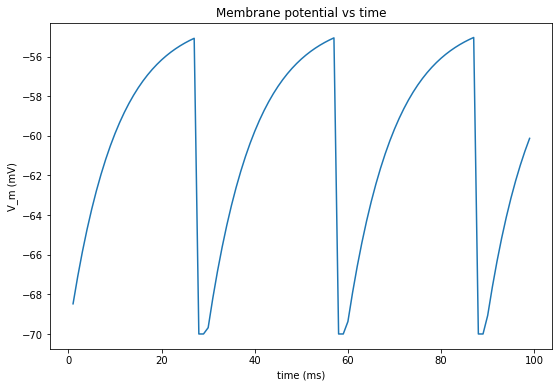

In [6]:
#Parameters
I_ext=400
dt=0.1
T=100
#I call the function of the LIF neuron
vm,sr = LIF_neuron(I_ext,dt,T)
#I run the simulation for a time T
nest.Simulate(T)
print(f"  Number of spikes: {sr.n_events}") #Number of spikes
#PLOT THE RESULT    
plot_LIF(vm)

Compare the function def_LIF that we used here with the one we used without Nest (LIF_neuron tutorial). 
Do you see the advantages?

In [7]:
#Answer:

Create your own plot of 1 LIF neuron:

In [7]:
#We create again 1 LIF neuron
nest.ResetKernel()
neuron = nest.Create("iaf_psc_alpha") #create the LIF neuron
neuron.I_e =376 #set the value of the I_ext to the neuron

multimeter = nest.Create("multimeter") #create the device to record the membrane potential
multimeter.set(record_from=["V_m"])
spikerecorder = nest.Create("spike_recorder") #create the device to record the spikes

nest.Connect(multimeter, neuron) #Connect the neuron to the devices
nest.Connect(neuron, spikerecorder)
nest.Simulate(1000.0) #Time of simulation in the brackets

#Get the values of the membran potential and the time to then be able to plot 
Vms = multimeter.get()["events"]["V_m"]
ts = multimeter.get()["events"]["times"]

Plot the evolution of the membrane potential of the neuron over time. 
You have all the variables, just put them in a plot! 

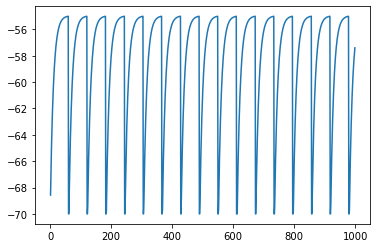

In [8]:
plt.plot(ts,Vms)

In [22]:
#Answer:

We want to visualize the spikes times in a plot. How can you do that using spike_recorder? 
Have a look: https://nest-simulator.readthedocs.io/en/stable/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html

Create the plot of the Spikes times:

In [25]:
#Answer:

Now that you learnt how to create a LIF neuron using Nest you can create your own new neuron using a different I_e.\
You can also change the other parameters if you whish ($ τ_m, C_m, V_r, V_{reset}, V_{th}, t_{ref}$) . \
Then plot your results as you learnt above. \
(To plot the results remember to create the multimeter and the spike recorder before the simulation)

In [16]:
#Answer: 


Now we want to create a network of LIF neurons, not only one neuron but a set of connected neurons. 

# LIF network using Nest

Let's create two neurons and connect them to obtain our first small network!

In [56]:
#create the two neurons
nest.ResetKernel()
neuron1 = nest.Create("iaf_psc_alpha")
neuron1.set(I_e=376.0)
neuron2 = nest.Create("iaf_psc_alpha")

What is the default value of I_e for neuron 2? \
Ask the value I_e as we did before. 

In [57]:
#Answer:

In [58]:
#Create the multimeter to record the membrane potential
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

Have a look at the documentation to see how you can connect 2 neurons. \
https://nest-simulator.readthedocs.io/en/stable/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html \
Connect the two neuron using a weight of 25. 

In [59]:
#Answer:

If you simulate the network and plot the membrane potential as before, 
you should then see the postsynaptic potentials of neuron2. \
Remember: before starting the simultion you should connect the recording device to neuron2

In [61]:
#Answer: 

Why is the neuron 2 spiking?  \
Is it because of his input or because of neuron 1 connected to it? 

In [64]:
#Answer: 

Congratulations you just created a network of 2 neurons!

Now let's see some more complex case with hundreds of neurons. Open "Populations_LIF_nest" 